# Source
https://www.kaggle.com/carrie1/ecommerce-data

# Context
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

# Content
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

# Acknowledgements
Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

# Inspiration
Analyses for this dataset could include time series, clustering, classification and more.

1. Data Preparation
2. Exploring the content of variables
    * Negative quantity and unitprice
    * Country
    * Customer
    * Product
3. Trending
    * New Customers by month
    * Sales by month

# 1. Data Preparation

## Import the library and data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import datetime as dt
from plotly.offline import init_notebook_mode,iplot
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Any results you write to the current directory are saved as output.# 1. Data Preparation

/kaggle/input/ecommerce-data/data.csv


In [64]:
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv',encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Check if there is any missing data

In [65]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

It seems that there're many rows which **CustomerID** is missing and a few row with (product) ** Description** is missing. I'll keep in mind about this but not filter it out yet.

Next, I'm going to check the type of data in each columns

In [66]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Convert **InvoiceDate** to datetime

In [67]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

#Convert date to year-month
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# 2. Exploring the content of variables

## 2.1 Negative Quantity and UnitPrice

Take a quick look in numerical columns

In [68]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The **min** in each column is negative value which probably means a refund order or the data is incorrect but I assume that it's a refund order. I'll check more about it, start with negative **Quantity**.

In [69]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12


The **InvoiceNo** has prefix **C** which probably means canceled order. I'll look into **CustomerID** 17584 data if we find something else.

In [70]:
df[df['CustomerID']==17548]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010-12
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom,2011-04
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,2011-04
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,2011-04


The **InvoiceNo** 550755 and C552049 are exactly the same in quantity and products, but the **InvoiceDate** of **C** is over a month later. So I think **InvoiceNo** with C in prefix is refund order.

Another case is **InvoiceNo** C536391 which has no matched order but if we look at the **InvoiceDate** and **index**, this refund order is very early in dataset, so I think it refund for the order that occured before the company collected the data.

Let's see if there're a lot of refunds.

In [71]:
cnt_order = df[df['Quantity']>0]['InvoiceNo'].nunique()
cnt_refund = df[df['Quantity']<0]['InvoiceNo'].nunique()


print("Total Orders : ",cnt_order)
print("Total Refund Order : ",cnt_refund)
print("%Refund : ",cnt_refund/(cnt_order)*100,"%")

Total Orders :  20728
Total Refund Order :  5172
%Refund :  24.951756078734082 %


Number of refund order is aroud 25%! We should dig deeper to find why the %refund is so high (may be I was wrong about refund).

I create **RefundFlg** to make in easier when we want to filter it.

In [72]:
df['RefundFlg'] = df['Quantity']<0

Finding out which products has the most %refund

In [73]:
prod_order = df[df['Quantity']>0].groupby(['StockCode','Description']).InvoiceNo.nunique().sort_values(ascending = False).reset_index()
prod_order = prod_order.rename(columns = {'InvoiceNo' : 'TotalOrder'})
prod_order_refund = df[df['Quantity']<0].groupby(['StockCode','Description']).InvoiceNo.nunique().sort_values(ascending = False).reset_index()
prod_order_refund = prod_order_refund.rename(columns = {'InvoiceNo' : 'TotalRefundOrder'})

join_prod_order = prod_order.merge(prod_order_refund,left_on = ["StockCode","Description"],right_on = ["StockCode","Description"],how = 'left')
join_prod_order['%Refund'] = join_prod_order['TotalRefundOrder']/join_prod_order['TotalOrder']*100
join_prod_order = join_prod_order.sort_values(by = 'TotalRefundOrder',ascending = False)
join_prod_order.head()

,StockCode,Description,TotalOrder,TotalRefundOrder,%Refund
479,M,Manual,294,223.0,75.850340
2,22423,REGENCY CAKESTAND 3 TIER,1989,180.0,9.049774
20,POST,POSTAGE,1126,124.0,11.012433
19,22960,JAM MAKING SET WITH JARS,1133,87.0,7.678729
6,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1385,73.0,5.270758


**M** doesn't seem like the name of product, may be there is something is hidden inside the data.

This time I'll sort by %refund but select only product that has at least 10 refund order.

In [74]:
join_prod_order = join_prod_order.sort_values(by = '%Refund',ascending = False)
join_prod_order[join_prod_order['TotalRefundOrder']>=10].head(10)

,StockCode,Description,TotalOrder,TotalRefundOrder,%Refund
3854,AMAZONFEE,AMAZON FEE,2,32.0,1600.000000
3818,S,SAMPLES,2,17.0,850.000000
3193,BANK CHARGES,Bank Charges,11,25.0,227.272727
479,M,Manual,294,223.0,75.850340
2792,23064,CINDERELLA CHANDELIER,23,10.0,43.478261
2282,23462,ROCOCO WALL MIRROR WHITE,45,12.0,26.666667
2130,22461,SAVOY ART DECO CLOCK,53,13.0,24.528302
2061,85159B,"WHITE TEA,COFFEE,SUGAR JARS",59,13.0,22.033898
1975,79191C,RETRO PLASTIC ELEPHANT TRAY,65,13.0,20.000000
1698,22198,LARGE POPCORN HOLDER,86,15.0,17.441860


The top 4 doesn't seem like the name of products and **TotalRefundOrder** is higher that **TotalOrder**! From the descriptions, I think in this case, it is about additional fee or discounted fee.

Even the top 4 is not the problems, other products in top 10 seem to be problems and should find out why these product has high %refund.

Next, I'll try to recalculate %refund again by excluding the non-product (top 4 in above table)

In [75]:
prod_only_order = join_prod_order[~join_prod_order['StockCode'].isin(['AMAZONFEE','S','BANK CHARGES','M'])]
TotalRefundProdOrder = prod_only_order['TotalRefundOrder'].sum()
TotalReProdOrder = prod_only_order['TotalOrder'].sum()
print("%Refund : ",TotalRefundProdOrder/TotalReProdOrder*100,"%")

%Refund :  1.6835593275765555 %


%Refund is 1.68%. It makes a lot more sense!

> **Comment on this part:**
    It's okay to use C as prefix to define that this order is refund but it would be a lot better if it can specify which order is refunded. For example, **InvoiceNo** : C1234 is the refund order of **InvoiceNo** : 1234 or you can create a new column that tell which ordered is refunded (the value of this column in normal order is null). 

Next let's see the data with negative **UnitPrice**.

In [76]:
df[df['UnitPrice']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,RefundFlg
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011-08,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011-08,False


The prefix of **InvoiceNo** is A in thist case and **Description** tell us that it means bad debt. So the company might give customers credit and some of them didn't pay back and becomes bad debt.

Creating **Net** column for easier calculation sales in the future. The **Net** is calculated from **Quantity** x **UnitPrice**. 

Note : Keep in mind that the refund order has negative **Net** value

In [77]:
df['Net'] = df['Quantity']*df['UnitPrice']

## 2.2 Country

In [78]:
sales_by_country = df.groupby(['Country']).Net.sum().sort_values(ascending = False).reset_index()
TotalSales = sales_by_country['Net'].sum()


sales_by_country['% of total sales'] = sales_by_country['Net']/TotalSales
#Top 5 countries by sales
sales_by_country.head()

,Country,Net,% of total sales
0,United Kingdom,8.187806e+06,0.839969
1,Netherlands,2.846615e+05,0.029203
2,EIRE,2.632768e+05,0.027009
3,Germany,2.216982e+05,0.022744
4,France,1.974039e+05,0.020251


Most of the sales are from UK which is around 84% of total sales (Company is based in UK)


## 2.3 Customers

In this part I'd like to learn more about the customers. I'll start with calculating:
* Average per Order (AOV)
* Repeat Customers : Customers who has more than 1 orders

Note : 
* There're many rows that **CustomerID** is missing so I'll filter out in this part.
* Assume that there is no refund and bad debt to simplify calculation

AOV :  480.7621873111767


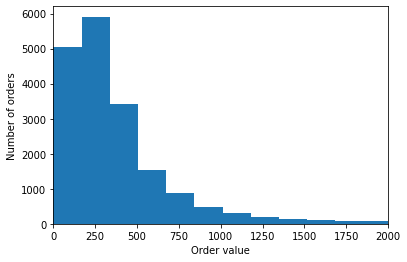

In [79]:
df_wt_cust = df[(df['CustomerID'].notnull()) & (df['Quantity']>0)]

order_net = df_wt_cust.groupby(['InvoiceNo']).Net.sum()
aov = order_net.mean()
plt.hist(order_net,bins=1000)
plt.xlim(0,2000)
plt.xlabel("Order value")
plt.ylabel("Number of orders")
print("AOV : ",aov)

The aov is 480. Next I'm going to find the %repeat customers.

From the last part, we learned that there're refunded orders, so I'll calculated number of orders per customer by count total orders and subtract by total refund order by each customer

%Repeat Customer :  65.48223350253807 %


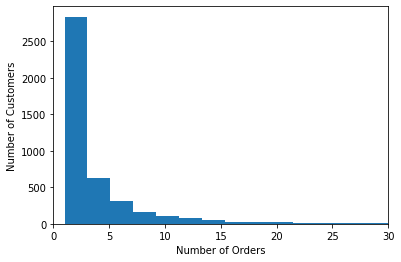

In [80]:
#Repeat Customers

#Exlude non-product rows

df_for_rpt_cust = df_wt_cust.copy()
df_for_rpt_cust = df_for_rpt_cust[~df_for_rpt_cust['StockCode'].isin(['AMAZONFEE','S','BANK CHARGES','M'])]

cust_wt_total_order = df_for_rpt_cust[df_for_rpt_cust['Net']>0].groupby(['CustomerID']).InvoiceNo.nunique().reset_index()
cust_wt_total_order = cust_wt_total_order.rename(columns = {'InvoiceNo' : 'TotalOrder'})

cust_wt_total_refund_order = df_for_rpt_cust[df_for_rpt_cust['Net']<0].groupby(['CustomerID']).InvoiceNo.nunique().reset_index()
cust_wt_total_refund_order = cust_wt_total_refund_order.rename(columns = {'InvoiceNo' : 'TotalRefundOrder'})

join_cust_wt_total_order = cust_wt_total_order.merge(cust_wt_total_refund_order,left_on = 'CustomerID',right_on='CustomerID',how = 'left')
# convert null to 0
join_cust_wt_total_order['TotalRefundOrder'] = np.where(join_cust_wt_total_order['TotalRefundOrder'].isnull(),0,join_cust_wt_total_order['TotalRefundOrder'])
join_cust_wt_total_order['TotalSuccessOrder'] = join_cust_wt_total_order['TotalOrder']-join_cust_wt_total_order['TotalRefundOrder']

join_cust_wt_total_order['RepeatFlg'] = join_cust_wt_total_order['TotalSuccessOrder']>=2

CntCustomer = join_cust_wt_total_order.CustomerID.nunique()
CntRepeatCustomer = join_cust_wt_total_order[join_cust_wt_total_order['RepeatFlg']==True].CustomerID.nunique()
PctRepeatCustomer = CntRepeatCustomer/CntCustomer

print("%Repeat Customer : ",PctRepeatCustomer*100,"%")

plt.hist(join_cust_wt_total_order['TotalSuccessOrder'],bins = 100)
plt.xlim(0,30)
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()



%Repeat Customer is 65.5% which is pretty high and many customers keep coming back multiple times.

Let's see which products that make customers keep coming back

In [81]:
df_wt_cust.groupby(['CustomerID','Description']).InvoiceNo.nunique().sort_values(ascending = False).reset_index().head(10)

,CustomerID,Description,InvoiceNo
0,14911.0,CARRIAGE,84
1,17841.0,CHILLI LIGHTS,63
2,14911.0,REGENCY CAKESTAND 3 TIER,50
3,17841.0,BLUE/CREAM STRIPE CUSHION COVER,49
4,17841.0,PACK OF 60 DINOSAUR CAKE CASES,46
5,17841.0,CHARLOTTE BAG SUKI DESIGN,45
6,17841.0,GUMBALL COAT RACK,45
7,17841.0,SKULL DESIGN TV DINNER TRAY,41
8,17841.0,SUKI SHOULDER BAG,40
9,17841.0,"RECORD FRAME 7"" SINGLE SIZE",37


From the top 10 products, we learn that there're customers who buy a lot of products and a lot of orders. These customers might buy this orders to sell in their area (just guessing)

The previous data table makes me curious about sales concentration in customers. If most of the sales are from just a few of  customers, I think it's risky for the company because when these customer gone, all of the sales gone.

The next thing I'm going to find is the number of customers that make 80% sales of the company. I want to make sure that this number is not too low. I'll select only sales in last 3 months (from 9Sep2011)

In [82]:
sales_by_cust = df_wt_cust[df_wt_cust['InvoiceDate']>dt.date(2011,9,9)].groupby('CustomerID').Net.sum().sort_values(ascending=False).reset_index()
TotalSales = sales_by_cust.Net.sum()
sales_by_cust['%TotalSales'] = sales_by_cust['Net']/TotalSales


def cust_concentration(threshold):

    cnt_cust = 0
    accm_pct = 0

    for index, row in sales_by_cust.iterrows():
        if accm_pct ==0:
            accm_pct = row['%TotalSales']
        else:
            accm_pct = accm_pct+row['%TotalSales']
        cnt_cust = cnt_cust+1
        
        if accm_pct>=threshold:
            return cnt_cust


print("70% of sales are from ",cust_concentration(0.7)," customers")        
print("80% of sales are from ",cust_concentration(0.8)," customers")
print("90% of sales are from ",cust_concentration(0.9)," customers")
print("100% of sales are from ",sales_by_cust.CustomerID.nunique()," customers")



70% of sales are from  597  customers
80% of sales are from  956  customers
90% of sales are from  1517  customers
100% of sales are from  2898  customers


80% of sales are from 956 customers which is pretty high number. So even some customers stop buying, it won't affect the company mmuch.

## 2.4 Products

It's the same as customer, I want to make sure that company sales don't rely to much on some products. So I'm going to find product sales concentration, the approach is the same as customers.

Note : Calculation in this case is not related to the **CustomerID**, so I'm going to use all data to calculate (even **CustomerID** is missing).

In [83]:
sales_by_prod = df[df['InvoiceDate']>dt.date(2011,9,9)].groupby('StockCode').Net.sum().sort_values(ascending=False).reset_index()
TotalSalesAll = sales_by_prod.Net.sum()
sales_by_prod['%TotalSales'] = sales_by_prod['Net']/TotalSalesAll

def prod_concentration(threshold):

    cnt_prod = 0
    accm_pct = 0

    for index, row in sales_by_prod.iterrows():
        if accm_pct ==0:
            accm_pct = row['%TotalSales']
        else:
            accm_pct = accm_pct+row['%TotalSales']
        cnt_prod = cnt_prod+1
        
        if accm_pct>=threshold:
            return cnt_prod


print("70% of sales are from ",prod_concentration(0.7)," products")        
print("80% of sales are from ",prod_concentration(0.8)," products")
print("90% of sales are from ",prod_concentration(0.9)," products")
print("100% of sales are from ",sales_by_prod.StockCode.nunique()," products")

70% of sales are from  432  products
80% of sales are from  633  products
90% of sales are from  972  products
100% of sales are from  3282  products


The number of products is high enough, so the company don't rely to much on few products.

# 3. Trending

In this part, I want to see if company is still okay by looking at trend in sales and customers.

## 3.1 Number of new customers by month

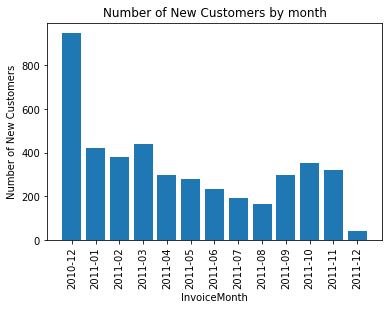

In [112]:

df_for_trend = df.copy()

#Define new customer

cust_wt_fst_order = df_for_trend.groupby(['CustomerID']).InvoiceDate.min().reset_index()
cust_wt_fst_order = cust_wt_fst_order.rename(columns = {"InvoiceDate" : "FirstInvoiceDate"})

df_for_trend = df_for_trend.merge(cust_wt_fst_order,left_on = 'CustomerID',right_on = 'CustomerID',how = 'left')

df_for_trend['FirstOrderFlg'] = (df_for_trend['InvoiceDate'] == df_for_trend['FirstInvoiceDate'])

df_new_cust = df_for_trend[df_for_trend['FirstOrderFlg']==True][['CustomerID','InvoiceMonth']].drop_duplicates()

agg_df_new_cust = df_new_cust.groupby("InvoiceMonth").CustomerID.nunique().reset_index()
plt.bar(agg_df_new_cust['InvoiceMonth'],agg_df_new_cust['CustomerID'])
plt.xticks(rotation=90)
plt.xlabel("InvoiceMonth")
plt.ylabel("Number of New Customers")
plt.title('Number of New Customers by month')
plt.show()


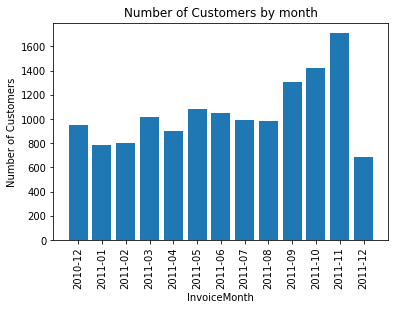

In [113]:
agg_df_cust = df_for_trend.groupby("InvoiceMonth").CustomerID.nunique().reset_index()

plt.bar(agg_df_cust['InvoiceMonth'],agg_df_cust['CustomerID'])
plt.xticks(rotation=90)
plt.xlabel("InvoiceMonth")
plt.ylabel("Number of Customers")
plt.title('Number of Customers by month')

plt.show()

## 3.2 Sales by month

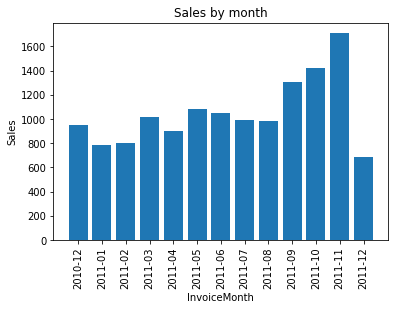

In [111]:
agg_sales = df_for_trend.groupby('InvoiceMonth').Net.sum().reset_index()

plt.bar(agg_df_cust['InvoiceMonth'],agg_df_cust['CustomerID'])
plt.xticks(rotation=90)
plt.xlabel("InvoiceMonth")
plt.ylabel("Sales")
plt.title('Sales by month')
plt.show()

From the chart above, it seems that the data on Dec2011 is not complete, so we'll look only data from Dec10-Nov11 (12 months).

Number of new customers is clearly in downtrend during Mar11-Aug11 and higher in Sep11-Nov11 because of high season period (data from sales by month that sales spike during the end of the year). One thing that company should be concern is customer acquisition because customer has their own lifecycle, so one day they'll churn anyway. There're many things that company can do such as increasing budget for acquiring new customers, analyzing the source of new customers to improve stretegies.

Another thing we learn from chart is seasonality is sales. Because the products of the company is gift, it depends on holidies or ceremonies (as we can see from sales at the end of the year). So the company should always prepare in inventory and manpower before peak season.